In [35]:
%matplotlib inline
import matplotlib
import pandas as pd 
import matplotlib.pyplot as plt 
matplotlib.style.use("seaborn")

In [36]:
df = pd.read_csv("data/clean_compras.csv")

In [37]:
df.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS_VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS_VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS_VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS_VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS_VARIOS


## Visión general del datasets

In [38]:
df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [39]:
df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [40]:
df.describe()

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


In [41]:
df = df[["BENEFICIARIO", "FACTURA", "CONTRATO", "CONCEPTO", "TIPO", "# OP", "FECHA", "IMPORTE", "SHEET"]]

In [42]:
df.head()

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS_VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS_VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS_VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS_VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS_VARIOS


## Análisis unidimensional de las variables

In [43]:
df["SHEET"].value_counts()

CONTRATISTAS_Y_FDO_FED    724
GASTOS_VARIOS             690
COMUNICACION               71
SERV._PERS.                46
SERV_PPROF                  9
Name: SHEET, dtype: int64

In [44]:
len(list(df['CONCEPTO'].value_counts()))

1396

In [45]:
df['BENEFICIARIO'].value_counts()[0:10]

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: BENEFICIARIO, dtype: int64

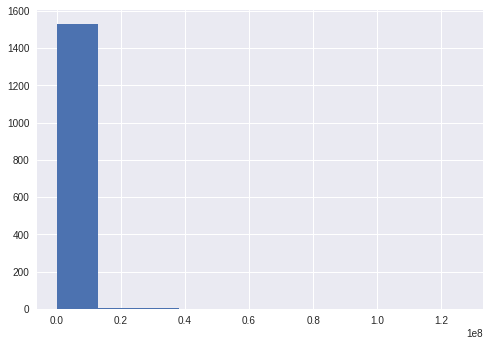

In [46]:
df['IMPORTE'].hist()

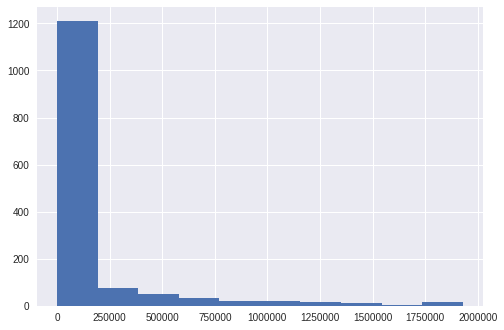

In [47]:
df[df["IMPORTE"] < df['IMPORTE'].quantile(0.95)]["IMPORTE"].hist()

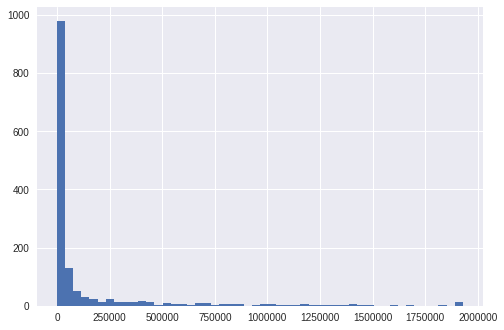

In [48]:
df[df["IMPORTE"] < df['IMPORTE'].quantile(0.95)]["IMPORTE"].hist(bins = 50)

## Análisis multidimensional de los variables

In [49]:
sum_importe_beneficiario = df.groupby("BENEFICIARIO").sum()['IMPORTE']
sum_importe_beneficiario

BENEFICIARIO
235 PROYECTOS, S.A. DE C.V.                   1649292.36
ABC Y CONSTRUCCIONES, SA. DE CV.              1311087.90
ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.       5914.30
ADQUISICIONES INTELIGENTES, S.A. DE C.V.      2132196.00
ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.          450859.52
                                                 ...    
VILLARREAL CARDENAS JUAN IGNACIO                 3733.13
VILLARREAL CARDENAS NANCY ESTHER                81461.14
VILLARREAL DE LEON BERTHA                       11004.05
VIVERO EL ESCORIAL, S.A. DE C.V.              2511255.46
ZAPATA CHAVIRA HOMERO ARTURO                    28350.00
Name: IMPORTE, Length: 301, dtype: float64

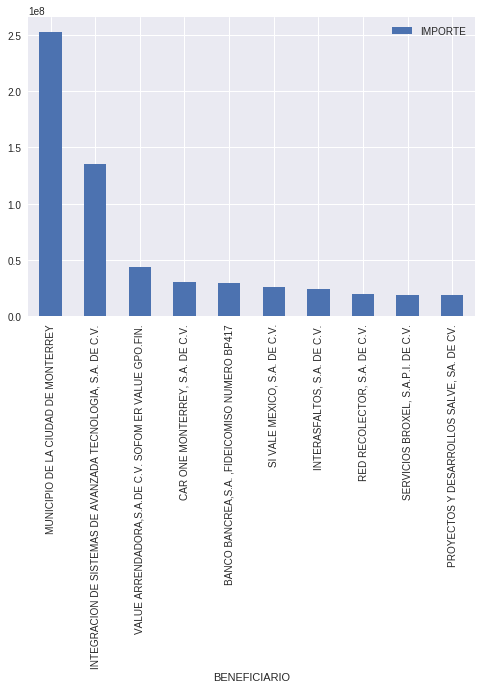

In [50]:
sum_importe_beneficiario.reset_index().sort_values(by = "IMPORTE", ascending = False).iloc[0:10].plot(kind = 'bar', x = "BENEFICIARIO", y = "IMPORTE")

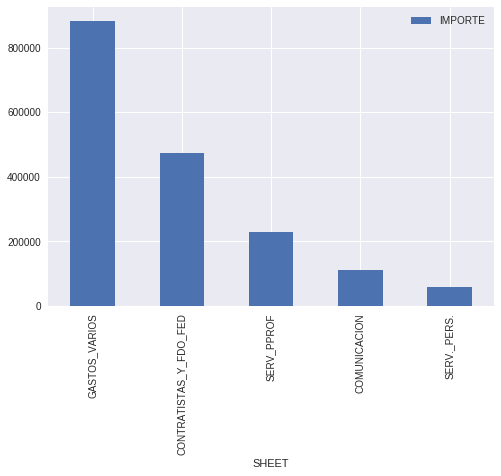

In [51]:
mean_import_sheet = df.groupby("SHEET").mean()['IMPORTE']
mean_import_sheet.reset_index().sort_values(by = "IMPORTE", ascending = False).iloc[0:10].plot(kind = "bar", x = "SHEET", y = "IMPORTE")

In [52]:
mean_import_sheet.reset_index().sort_values(by = "IMPORTE", ascending = False).iloc[0:10]

,SHEET,IMPORTE
2,GASTOS_VARIOS,881659.731797
1,CONTRATISTAS_Y_FDO_FED,474566.765787
4,SERV_PPROF,229592.166667
0,COMUNICACION,109705.343662
3,SERV._PERS.,59623.405217


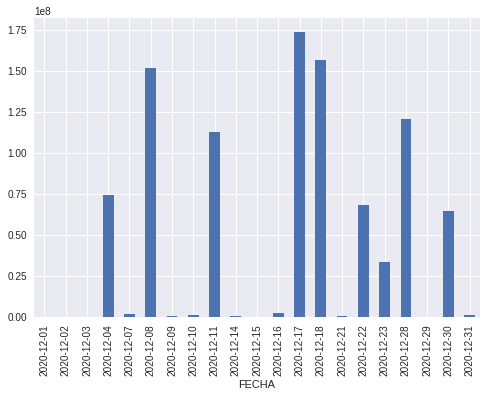

In [53]:
sum_importe_fecha = df.groupby("FECHA").sum()["IMPORTE"].plot(kind = "bar")
sum_importe_fecha

In [54]:
compras_sheet_beneficiarios = df.groupby(["BENEFICIARIO", "SHEET"]).sum()["IMPORTE"].sort_values().unstack('SHEET')
compras_sheet_beneficiarios

SHEET,COMUNICACION,CONTRATISTAS_Y_FDO_FED,GASTOS_VARIOS,SERV._PERS.,SERV_PPROF
BENEFICIARIO,,,,,
"235 PROYECTOS, S.A. DE C.V.",NaN,NaN,1649292.36,NaN,NaN
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,1311087.9,NaN,NaN,NaN
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",NaN,NaN,5914.30,NaN,NaN
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",NaN,2132196.0,NaN,NaN,NaN
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",NaN,NaN,450859.52,NaN,NaN
...,...,...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,NaN,NaN,NaN,3733.13,NaN
VILLARREAL CARDENAS NANCY ESTHER,NaN,NaN,NaN,81461.14,NaN
VILLARREAL DE LEON BERTHA,NaN,NaN,11004.05,NaN,NaN


In [55]:
top_beneficiarios = df.groupby("BENEFICIARIO")['IMPORTE'].sum().sort_values(ascending = False).index[0:10]
top_beneficiarios

Index(['MUNICIPIO DE LA CIUDAD DE MONTERREY',
       'INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA, S.A. DE C.V.',
       'VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.',
       'CAR ONE MONTERREY, S.A. DE C.V.',
       'BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417',
       'SI VALE MEXICO, S.A. DE C.V.', 'INTERASFALTOS, S.A. DE C.V.',
       'RED RECOLECTOR, S.A. DE C.V.', 'SERVICIOS BROXEL, S.A.P.I. DE C.V.',
       'PROYECTOS Y DESARROLLOS SALVE, SA. DE CV.'],
      dtype='object', name='BENEFICIARIO')

In [56]:
compras_sheet_beneficiarios.loc[top_beneficiarios]

SHEET,COMUNICACION,CONTRATISTAS_Y_FDO_FED,GASTOS_VARIOS,SERV._PERS.,SERV_PPROF
BENEFICIARIO,,,,,
MUNICIPIO DE LA CIUDAD DE MONTERREY,NaN,3.412500e+04,2.526895e+08,NaN,NaN
"INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA, S.A. DE C.V.",NaN,1.281179e+08,7.493040e+06,NaN,NaN
"VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.",NaN,NaN,4.382056e+07,NaN,NaN
"CAR ONE MONTERREY, S.A. DE C.V.",NaN,2.229764e+07,8.346672e+06,NaN,NaN
"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",NaN,NaN,3.000000e+07,NaN,NaN
"SI VALE MEXICO, S.A. DE C.V.",NaN,NaN,2.600384e+07,NaN,NaN
"INTERASFALTOS, S.A. DE C.V.",NaN,NaN,2.404647e+07,NaN,NaN
"RED RECOLECTOR, S.A. DE C.V.",NaN,1.951267e+07,NaN,NaN,NaN
"SERVICIOS BROXEL, S.A.P.I. DE C.V.",NaN,NaN,1.941272e+07,NaN,NaN


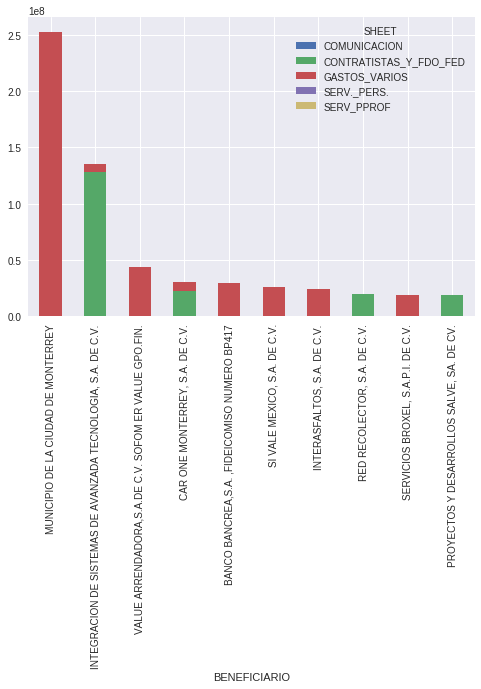

In [57]:
compras_sheet_beneficiarios.loc[top_beneficiarios].plot.bar(stacked = True)

## Análisis de texto

In [58]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
print(stopwords.words("spanish"))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to /home/darian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
textos_compras = ''
for row in df['CONCEPTO']: 
    textos_compras = textos_compras + ' ' + row

In [60]:
textos_compras

' REEMPLAZO E INSTALACION DE AMORTIGUADORES (DELANTEROS Y TRASEROS), ROTULAS SUPERIORES Y ALINEACION.PATRIMONIO 82357 2017 RAM 4000 REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE TUERCAS. PATRIMONIO 80383 2010 RAM 4000 REEMPLAZO DE DOS RINES  (17). PATRIMONIO 80383 2010 RAM 4000 REEMPLAZO DE  DOS RINES  (14). PATRIMONIO 80072 2010 PICK UP ESTACAS REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO 82646 2017 AVEO COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., AGOSTO 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., SEPTIEMBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., OCTUBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., SEPTIEMBRE Y OCTUBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., SEPTIEMBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., OCTUBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., OCTUBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS 

In [61]:
stopwords_list = stopwords.words('spanish') + ['2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [85]:
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(" ") if x not in stopwords_list and len(x)>4])

In [86]:
from wordcloud import WordCloud

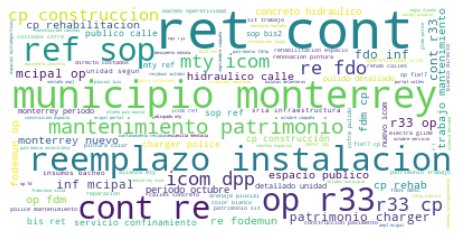

In [89]:
wc = WordCloud(background_color = 'white')
wc.generate(textos_compras)

plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [91]:
df

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS_VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS_VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS_VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS_VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS_VARIOS
...,...,...,...,...,...,...,...,...,...
1535,SEGOVIA PAEZ MARCELO,116033-158004-1689,NO APLICA,FINIQUITO 116033,CH,1104570.0,2020-12-11,183992.72,SERV._PERS.
1536,SEGOVIA PAEZ MARCELO,116033-158004-1690,NO APLICA,FONDO PENSIONES 116033,CH,1104571.0,2020-12-11,56430.00,SERV._PERS.
1537,TORRES ACOSTA ROBERTO CARLOS,113052-158004-1725,NO APLICA,FONDO DE PENSIONES 113052,CH,299000183.0,2020-12-16,7425.00,SERV._PERS.
1538,TOVAR CEDILLO JAVIER ALFONSO,23016-158004-1705,NO APLICA,PAGO 30% JUICIO DE AMPARO No. 673/2020 (DICIE...,CH,299000179.0,2020-12-15,4084.68,SERV._PERS.
